# Europe PMC API Search for AI/ML Papers - FAIR & Open AI paper figures, etc

## 0. Import necessary libraries
## 1. Retrieve paper figures and produce graphs from all papers matching terms 'machine learning' and 'artificial intelligence' from 2000 onwards
## 2. Produce CSV of all papers matching terms 'machine learning' and 'artificial intelligence' from 2000 onwards - contains citations and full titles, etc
## 3. Identify ML methods relevant papers - keyword matching and weighting

### 0. Import necesary libraries

In [2]:
# 0.Import relevant libraries
import requests
import pandas as pd
import time
from datetime import datetime
import os
import glob

### 1. Retrieve paper figures and produce graphs from all papers matching terms 'machine learning' and 'artificial intelligence' from 2000 onwards

In [1]:
#Define function of get_paper_count_by_year to get paper metadata counts from EPMC for these years
def get_paper_count_by_year(start_year, end_year, query_terms):
    """Get total paper count in Europe PMC for each year in the range.
    
    Args:
        start_year (int): First year to query
        end_year (int): Last year to query (defaults to current year)
        
    Returns:
        pandas.DataFrame: DataFrame with year and paper counts
    """
    
    base_url = "https://www.ebi.ac.uk/europepmc/webservices/rest/search"
    
    years = []
    counts = []
    
    for year in range(start_year, end_year + 1):
        # Use the PUB_YEAR:<year> syntax to query specific years
        params = {
            "query": f"{query_terms} AND PUB_YEAR:{year}",
            "resultType": "core",
            "pageSize": 1,  # We only need the count, not actual results
            "format": "json"
        }
        
        try:
            response = requests.get(base_url, params=params)
            if response.status_code == 200:
                data = response.json()
                # Extract the hit count
                total_count = data.get("hitCount", 0)
                
                years.append(year)
                counts.append(total_count)
                
                print(f"Year {year}: {total_count:,} papers")
            else:
                print(f"Error for year {year}: {response.status_code}")
            
            # Add a small delay to avoid hitting rate limits
            time.sleep(0.1)
        except Exception as e:
            print(f"Exception for year {year}: {e}")
    
    # Create DataFrame
    df_years = pd.DataFrame({
        "Year": years,
        "Paper Count": counts
    })
    
    # Save the results to a CSV file
    filename = f"paper_counts_{query_terms}.csv"
    df_years.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

    return df_years

#Define range of years to query
start_year = 2000
end_year = 2024
# Define terms to query (Machine learning & articifial intelligence & all papers by using empty search)
query_terms = ['Machine learning', 'Artificial intelligence', '']

# Get paper counts for the 2000-2024 range
print(f"Retrieving paper counts from {start_year} to {end_year}...")
df_counts = get_paper_count_by_year(start_year, end_year, query_terms=query_terms)

# Display the results
for term in query_terms:
    get_paper_count_by_year(start_year, end_year, query_terms=term)

# Delete the amalgam CSV file glitch - workaround
files_to_remove = glob.glob('paper_counts_[*.csv')

# Iterate over the list of files and remove them
for file in files_to_remove:
    os.remove(file)
    print(f'Removed: {file}')

# Put the 3x files into a folder
os.makedirs('paper_counts', exist_ok=True)
os.rename('paper_counts_Machine learning.csv', 'paper_counts/paper_counts_Machine learning.csv')
os.rename('paper_counts_Artificial intelligence.csv', 'paper_counts/paper_counts_Artificial intelligence.csv')
os.rename('paper_counts_.csv', 'paper_counts/paper_counts_total.csv')
print('Files moved to folder: paper counts')


Retrieving paper counts from 2000 to 2024...
Exception for year 2000: name 'requests' is not defined
Exception for year 2001: name 'requests' is not defined
Exception for year 2002: name 'requests' is not defined
Exception for year 2003: name 'requests' is not defined
Exception for year 2004: name 'requests' is not defined
Exception for year 2005: name 'requests' is not defined
Exception for year 2006: name 'requests' is not defined
Exception for year 2007: name 'requests' is not defined
Exception for year 2008: name 'requests' is not defined
Exception for year 2009: name 'requests' is not defined
Exception for year 2010: name 'requests' is not defined
Exception for year 2011: name 'requests' is not defined
Exception for year 2012: name 'requests' is not defined
Exception for year 2013: name 'requests' is not defined
Exception for year 2014: name 'requests' is not defined
Exception for year 2015: name 'requests' is not defined
Exception for year 2016: name 'requests' is not defined
Exc

NameError: name 'pd' is not defined

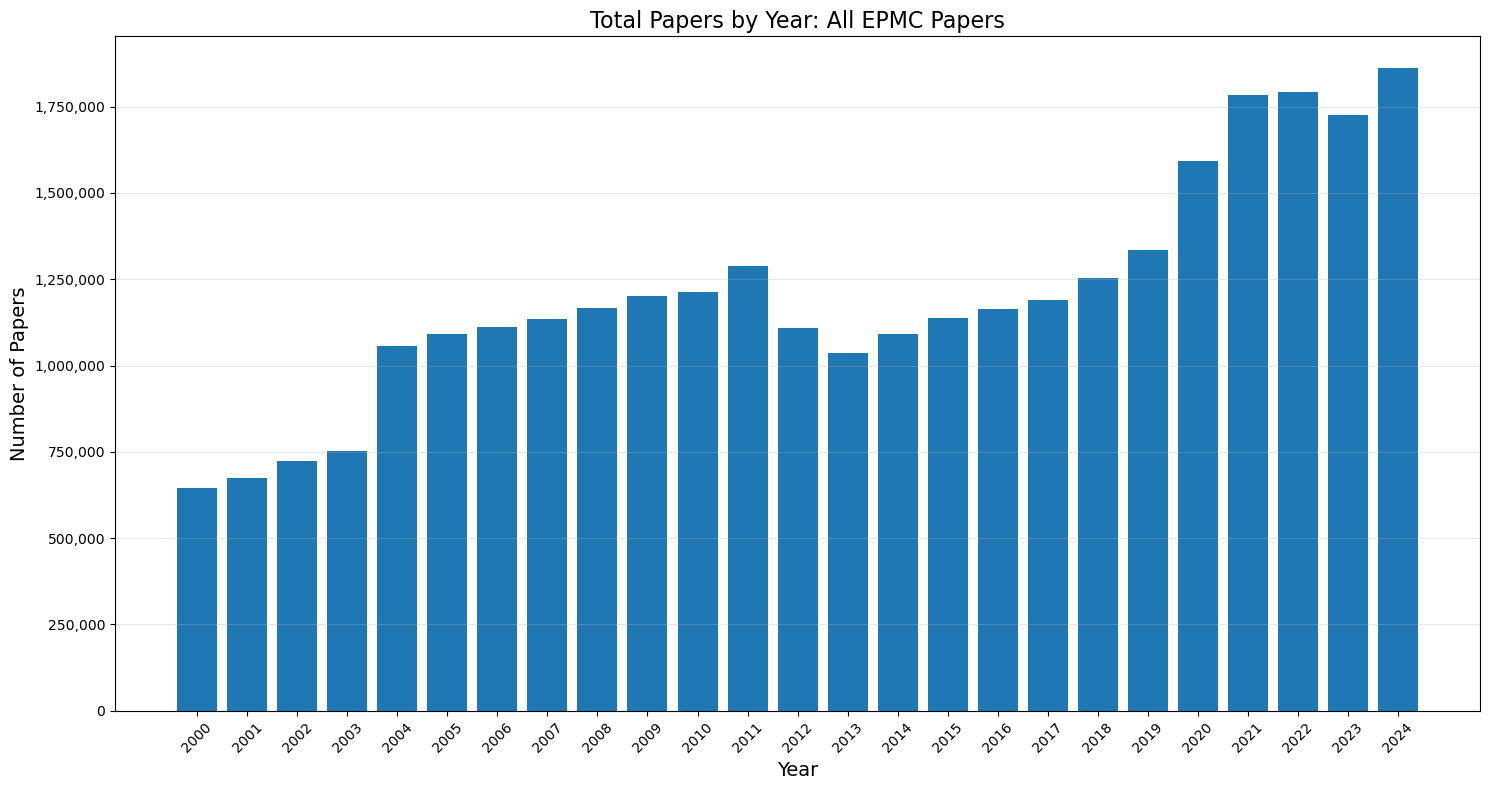

<Figure size 640x480 with 0 Axes>

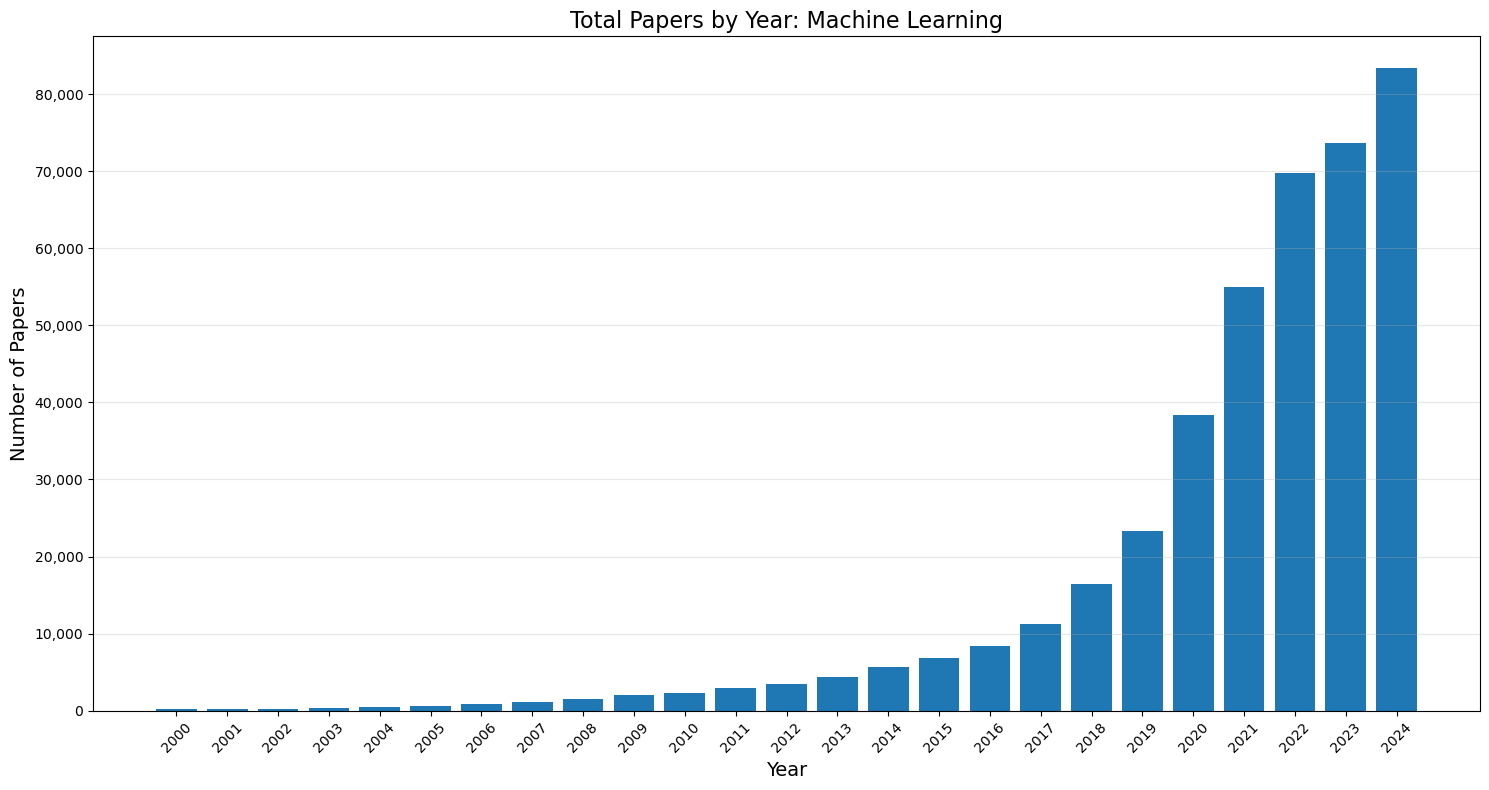

<Figure size 640x480 with 0 Axes>

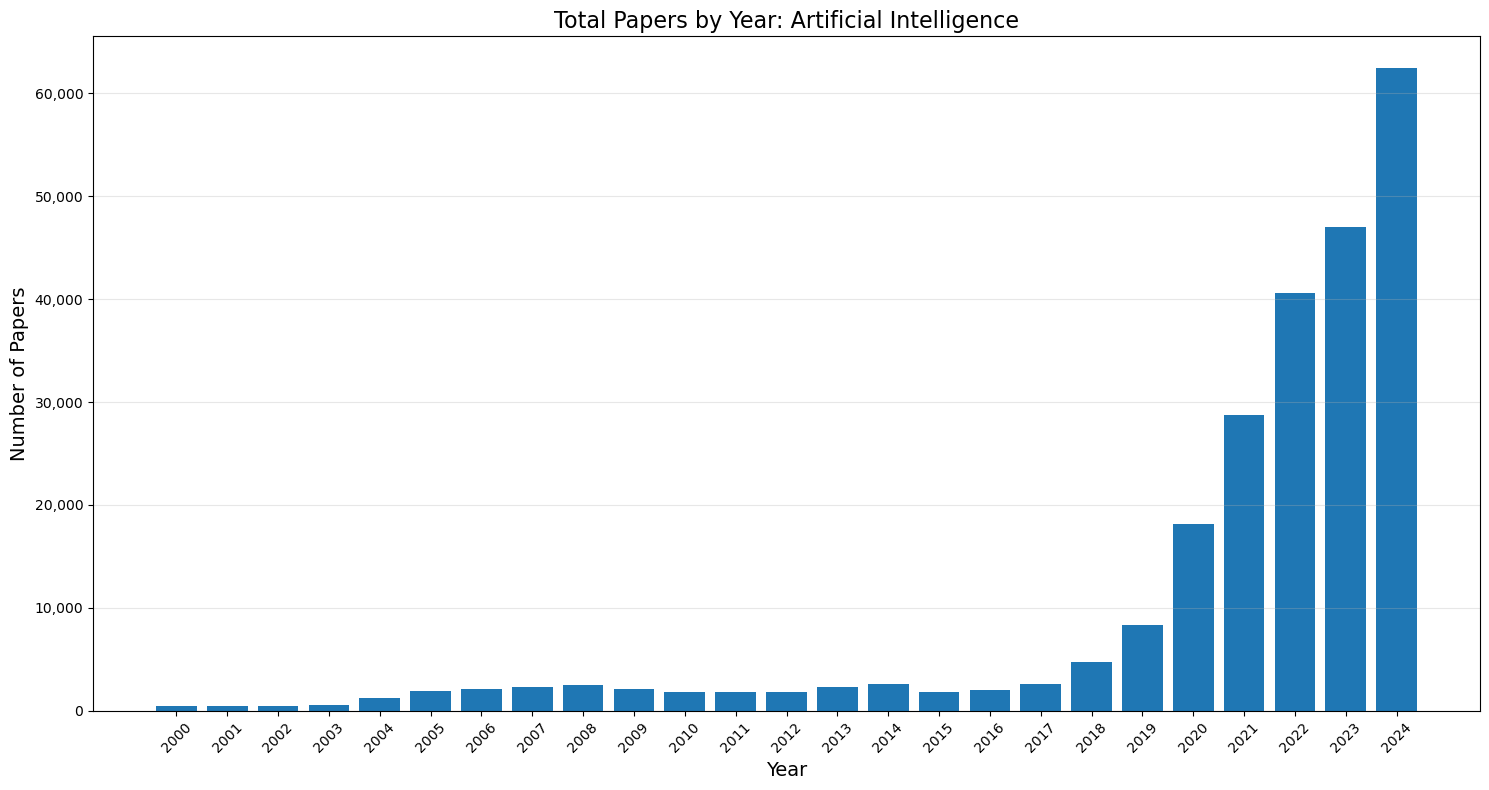

PNG files moved to folder: paper_counts_png


<Figure size 640x480 with 0 Axes>

In [78]:
# Create 3x bar chart of paper counts by year
import matplotlib.pyplot as plt
# Read in the 3x CSV file names as list item
# define an empty list to append file names

# Read in the CSV files as dataframes 
for file in os.listdir('paper_counts'):
    if 'Machine learning' in file:
        df_ml = pd.read_csv(f'paper_counts/{file}')
    elif 'Artificial intelligence' in file:
        df_ai = pd.read_csv(f'paper_counts/{file}')
    else:
        df_counts = pd.read_csv(f'paper_counts/{file}')

dataframes_paper_counts_list = [df_counts, df_ml, df_ai]

# Turn plotting code into a function
def plot_csv(df, title):
    plt.figure(figsize=(15, 8))
    plt.bar(df['Year'], df['Paper Count'])
    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Papers', fontsize=14)
    plt.xticks(df['Year'], rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.tight_layout()
    plt.show()

# Plot the 3x CSV files
title_names = ['All EPMC Papers', 'Machine Learning', 'Artificial Intelligence']
i = 0
for df in dataframes_paper_counts_list:
    title = f"Total Papers by Year: {title_names[i]}"
    plot_csv(df, title)
    file_title = title_names[i].replace(' ', '_')
    plt.savefig(file_title+'.png')
    i += 1

# Move the 3x PNG files into the folder
os.makedirs('paper_counts_png', exist_ok=True)
os.rename('All_EPMC_Papers.png', 'paper_counts_png/All_EPMC_Papers.png')
os.rename('Machine_Learning.png', 'paper_counts_png/Machine_Learning.png')
os.rename('Artificial_Intelligence.png', 'paper_counts_png/Artificial_Intelligence.png')
print('PNG files moved to folder: paper_counts_png')



### 2. Produce CSV of all papers matching terms 'machine learning' and 'artificial intelligence' from 2000 onwards - contains citations and full titles, etc

In [3]:
# Define function to get paper metadata from EPMC
# Fix journal retrieval
import requests
import pandas as pd
import time
from tqdm import tqdm

def search_europe_pmc(query, page_size=1000, max_results=100000000):
    """
    Search Europe PMC API for articles matching a query term
    
    Parameters:
    query (str): Search term
    page_size (int): Number of results per page
    max_results (int): Maximum number of results to return
    
    Returns:
    list: List of article metadata
    """
    base_url = "https://www.ebi.ac.uk/europepmc/webservices/rest/search"
    
    results = []
    cursor_mark = "*"
    total_retrieved = 0
    
    pbar = tqdm(total=min(max_results, 100000000), desc=f"Fetching {query} articles")
    
    while total_retrieved < max_results:
        params = {
            "query": query,
            "resultType": "core",
            "pageSize": page_size,
            "cursorMark": cursor_mark,
            "format": "json",
            "sort": "CITED desc"  # Sort by citation count descending
        }
        
        response = requests.get(base_url, params=params)
        
        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            break
        
        data = response.json()
        
        # Check if we have results
        if "resultList" not in data or "result" not in data["resultList"]:
            break
        
        results.extend(data["resultList"]["result"])
        total_retrieved += len(data["resultList"]["result"])
        pbar.update(len(data["resultList"]["result"]))
        
        # Update cursor for next page
        new_cursor_mark = data.get("nextCursorMark", "")
        if new_cursor_mark == cursor_mark or new_cursor_mark == "":
            break
        cursor_mark = new_cursor_mark
        
        # Respect API rate limits
        time.sleep(0.3)
        
        if total_retrieved >= max_results:
            break
    
    pbar.close()
    return results[:max_results]

def extract_metadata(articles):
    """
    Extract relevant metadata from articles
    
    Parameters:
    articles (list): List of article data from Europe PMC
    
    Returns:
    list: List of dictionaries with extracted metadata
    """
    metadata = []
    
    for article in articles:
        data = {
            "DOI": article.get("doi", ""),
            "PMID": article.get("pmid", ""),
            "PMCID": article.get("pmcid", ""),
            "Year": article.get("pubYear", ""),
            "Citation_Count": article.get("citedByCount", 0),
            "Title": article.get("title", ""),
            "Abstract": article.get("abstractText", "No abstract available"),
            "Journal": article.get("journalInfo", {}).get("journal", {}).get("title", ""),
            "Authors": ", ".join([author.get("fullName", "") for author in article.get("authorList", {}).get("author", [])]) if "authorList" in article else ""
        }
        metadata.append(data)
    
    return metadata

def main():
    # Search terms
    search_terms = ["machine learning"]
    max_results_per_term = 50000000  # Adjust as needed
    
    for term in search_terms:
        print(f"\nSearching for '{term}'...")
        articles = search_europe_pmc(term, max_results=max_results_per_term)
        
        if not articles:
            print(f"No results found for '{term}'")
            continue
        
        metadata = extract_metadata(articles)
        
        # Convert to DataFrame and save to CSV
        df = pd.DataFrame(metadata)
        output_file = f"/home/gavinfarrell/PhD_Code/FAIR_OPEN_AI_Paper/{term.replace(' ', '_')}_metadata.csv"
        df.to_csv(output_file, index=False)
        
        print(f"Retrieved {len(metadata)} articles for '{term}'")
        print(f"Data saved to {output_file}")
        
        # Basic statistics
        print(f"Average citation count: {df['Citation_Count'].mean():.2f}")
        print(f"Publication years range: {df['Year'].min()} - {df['Year'].max()}")

if __name__ == "__main__":
    main()


Searching for 'machine learning'...


Fetching machine learning articles:   1%|          | 438826/50000000 [29:00<54:36:05, 252.14it/s]


Retrieved 438826 articles for 'machine learning'
Data saved to /home/gavinfarrell/PhD_Code/FAIR_OPEN_AI_Paper/machine_learning_metadata.csv
Average citation count: 10.74
Publication years range:  - 2025


In [ ]:
# run the rest again but now with journal and abstract

In [4]:
# Deduplicate data overlapping between the two search terms
# Read in the two CSV files
df_ml = pd.read_csv('machine_learning_metadata.csv')
# print row count
print(f"Machine Learning row count: {len(df_ml)}")
df_ai = pd.read_csv('artificial_intelligence_metadata.csv')
# print row count
print(f"Artificial Intelligence row count: {len(df_ai)}")

# Combine the two datasets
df_combined = pd.concat([df_ml, df_ai], ignore_index=True)
# print row count
print(f"Combined row count: {len(df_combined)}")

# Deduplicate the combined dataset
df_combined = df_combined.drop_duplicates(subset='DOI')
# print row count
#print(f"Deduplicated row count: {len(df_combined)}")

# Save the deduplicated dataset
df_combined.to_csv('combined_metadata.csv', index=False)
print(f"Combined dataset saved to 'combined_metadata.csv'")
print(f"Total number of articles: {len(df_combined)}")


Machine Learning row count: 438826
Artificial Intelligence row count: 266810
Combined row count: 705636
Combined dataset saved to 'combined_metadata.csv'
Total number of articles: 551549


### 3. Identify ML methods relevant papers - keyword matching and weighting

In [6]:
#Title only term matching
import pandas as pd
import numpy as np
import re

def weighted_term_matching(df, key_terms, title_column='Title'):
    """
    Match titles against key terms with weighted scoring
    
    Parameters:
    - df (pandas DataFrame): Input DataFrame
    - key_terms (list): List of terms to match against
    - title_column (str): Name of the column containing titles
    
    Returns:
    - DataFrame with original data and match details
    """
    # Preprocessing function
    def preprocess(text):
        # Convert to lowercase, remove punctuation
        return re.sub(r'[^\w\s]', '', str(text).lower())
    
    # Results storage
    results = []
    
    # Process each title
    for _, row in df.iterrows():
        # Preprocess title
        processed_title = preprocess(row[title_column])
        
        # Track matches
        matches = []
        total_weight = 0
        
        # Check each term
        for term in key_terms:
            # Preprocess term
            processed_term = preprocess(term)
            
            # Calculate match details
            if processed_term in processed_title:
                # Basic weight: longer terms get higher weight
                weight = len(processed_term.split())
                matches.append({
                    'term': term,
                    'weight': weight
                })
                total_weight += weight
        
        # Compile result dictionary with original row data
        result = row.to_dict()
        result.update({
            'matches': str(matches),  # Convert to string for CSV compatibility
            'match_count': len(matches),
            'total_weight': total_weight,
            'match_percentage': (total_weight / len(key_terms)) * 100 if key_terms else 0
        })
        
        results.append(result)
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by total weight and match count
    results_df = results_df.sort_values(['total_weight', 'match_count'], ascending=False)
    
    # Save the results to CSV
    results_df.to_csv('title_mlonly_weighted_term_matching_results.csv', index=False)

    return results_df

# Load the combined metadata file
df = pd.read_csv('combined_metadata.csv')

# Load search terms
search_terms = pd.read_csv('title_abstract_categorized_top500_terms.csv')['Term'].str.lower().tolist()

# Extract only the ml terms from the top 500 terms
ml_terms = pd.read_csv('title_abstract_categorized_top500_terms.csv')
ml_terms = ml_terms[ml_terms['Category'] == 'ML']
ml_terms = ml_terms['Term'].str.lower().tolist()
#print the ml terms
#print(ml_terms)

# Perform weighted term matching
matched_results = weighted_term_matching(df, ml_terms)

# Print summary
print(f"Total rows processed: {len(matched_results)}")
print(f"Columns in results: {list(matched_results.columns)}")
print("\nTop 5 matches:")
print(matched_results[['Title', 'match_count', 'total_weight', 'match_percentage']].head())

Total rows processed: 551549
Columns in results: ['DOI', 'PMID', 'PMCID', 'Year', 'Citation_Count', 'Title', 'Abstract', 'Journal', 'Authors', 'matches', 'match_count', 'total_weight', 'match_percentage']

Top 5 matches:
                                                    Title  match_count  \
4618    Data mining methods in the prediction of Demen...           22   
61771   Combining deep residual neural network feature...           16   
34353   The Performance of Deep Learning Algorithms on...           15   
192644  Benchmarking feature selection and feature ext...           15   
320175  A Powerful Approach to improve Link Prediction...           15   

        total_weight  match_percentage  
4618              22         13.414634  
61771             16          9.756098  
34353             15          9.146341  
192644            15          9.146341  
320175            15          9.146341  


In [7]:
#Abstract only term matching
import pandas as pd
import numpy as np
import re

def weighted_term_matching(df, key_terms, title_column='Abstract'):
    """
    Match titles against key terms with weighted scoring
    
    Parameters:
    - df (pandas DataFrame): Input DataFrame
    - key_terms (list): List of terms to match against
    - title_column (str): Name of the column containing titles
    
    Returns:
    - DataFrame with original data and match details
    """
    # Preprocessing function
    def preprocess(text):
        # Convert to lowercase, remove punctuation
        return re.sub(r'[^\w\s]', '', str(text).lower())
    
    # Results storage
    results = []
    
    # Process each title
    for _, row in df.iterrows():
        # Preprocess title
        processed_title = preprocess(row[title_column])
        
        # Track matches
        matches = []
        total_weight = 0
        
        # Check each term
        for term in key_terms:
            # Preprocess term
            processed_term = preprocess(term)
            
            # Calculate match details
            if processed_term in processed_title:
                # Basic weight: longer terms get higher weight
                weight = len(processed_term.split())
                matches.append({
                    'term': term,
                    'weight': weight
                })
                total_weight += weight
        
        # Compile result dictionary with original row data
        result = row.to_dict()
        result.update({
            'matches': str(matches),  # Convert to string for CSV compatibility
            'match_count': len(matches),
            'total_weight': total_weight,
            'match_percentage': (total_weight / len(key_terms)) * 100 if key_terms else 0
        })
        
        results.append(result)
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by total weight and match count
    results_df = results_df.sort_values(['total_weight', 'match_count'], ascending=False)
    
    # Save the results to CSV
    results_df.to_csv('abstract_mlonly_weighted_term_matching_results.csv', index=False)

    return results_df

# Load the combined metadata file
df = pd.read_csv('combined_metadata.csv')

# Load search terms
search_terms = pd.read_csv('title_abstract_categorized_top500_terms.csv')['Term'].str.lower().tolist()

# Extract only the ml terms from the top 500 terms
ml_terms = pd.read_csv('title_abstract_categorized_top500_terms.csv')
ml_terms = ml_terms[ml_terms['Category'] == 'ML']
ml_terms = ml_terms['Term'].str.lower().tolist()
#print the ml terms
#print(ml_terms)

# Perform weighted term matching
matched_results = weighted_term_matching(df, ml_terms)

# Print summary
print(f"Total rows processed: {len(matched_results)}")
print(f"Columns in results: {list(matched_results.columns)}")
print("\nTop 5 matches:")
print(matched_results[['Title', 'match_count', 'total_weight', 'match_percentage']].head())

Total rows processed: 551549
Columns in results: ['DOI', 'PMID', 'PMCID', 'Year', 'Citation_Count', 'Title', 'Abstract', 'Journal', 'Authors', 'matches', 'match_count', 'total_weight', 'match_percentage']

Top 5 matches:
                                                    Title  match_count  \
276984  Development of Machine Learning-based Algorith...           70   
51021   Can Predictive Modeling Tools Identify Patient...           68   
283444  Evaluation of stroke sequelae and rehabilitati...           68   
315571  Highly sensitive detection platform-based diag...           68   
349308  Deep convolutional neural network and IoT tech...           68   

        total_weight  match_percentage  
276984            70         42.682927  
51021             68         41.463415  
283444            68         41.463415  
315571            68         41.463415  
349308            68         41.463415  


In [8]:
# Both title and abstract term matching
import pandas as pd
import numpy as np
import re

def weighted_term_matching(df, key_terms, columns_to_match=['Abstract', 'Title']):
    """
    Match multiple columns against key terms with weighted scoring
    
    Parameters:
    - df (pandas DataFrame): Input DataFrame
    - key_terms (list): List of terms to match against
    - columns_to_match (list): Names of columns to search for matches
    
    Returns:
    - DataFrame with original data and match details
    """
    # Preprocessing function
    def preprocess(text):
        # Convert to lowercase, remove punctuation
        return re.sub(r'[^\w\s]', '', str(text).lower())
    
    # Results storage
    results = []
    
    # Process each row
    for _, row in df.iterrows():
        # Track matches
        matches = []
        total_weight = 0
        
        # Check each column specified for matching
        for column in columns_to_match:
            # Preprocess text in the column
            processed_text = preprocess(row[column])
            
            # Check each term
            for term in key_terms:
                # Preprocess term
                processed_term = preprocess(term)
                
                # Calculate match details
                if processed_term in processed_text:
                    # Basic weight: longer terms get higher weight
                    weight = len(processed_term.split())
                    matches.append({
                        'term': term,
                        'column': column,
                        'weight': weight
                    })
                    total_weight += weight
        
        # Compile result dictionary with original row data
        result = row.to_dict()
        result.update({
            'matches': str(matches),  # Convert to string for CSV compatibility
            'match_count': len(matches),
            'total_weight': total_weight,
            'match_percentage': (total_weight / (len(key_terms) * len(columns_to_match))) * 100 if key_terms else 0
        })
        
        results.append(result)
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort by total weight and match count
    results_df = results_df.sort_values(['total_weight', 'match_count'], ascending=False)
    
    # Save the results to CSV
    results_df.to_csv('multi_column_weighted_term_matching_results.csv', index=False)

    return results_df

# Load the combined metadata file
df = pd.read_csv('combined_metadata.csv')

# Load search terms
search_terms = pd.read_csv('title_abstract_categorized_top500_terms.csv')['Term'].str.lower().tolist()

# Extract only the ml terms from the top 500 terms
ml_terms = pd.read_csv('title_abstract_categorized_top500_terms.csv')
ml_terms = ml_terms[ml_terms['Category'] == 'ML']
ml_terms = ml_terms['Term'].str.lower().tolist()

# Perform weighted term matching across Abstract and Title columns
matched_results = weighted_term_matching(df, ml_terms, columns_to_match=['Abstract', 'Title'])

# Print summary
print(f"Total rows processed: {len(matched_results)}")
print(f"Columns in results: {list(matched_results.columns)}")
print("\nTop 5 matches:")
print(matched_results[['Title', 'match_count', 'total_weight', 'match_percentage']].head())


Total rows processed: 551549
Columns in results: ['DOI', 'PMID', 'PMCID', 'Year', 'Citation_Count', 'Title', 'Abstract', 'Journal', 'Authors', 'matches', 'match_count', 'total_weight', 'match_percentage']

Top 5 matches:
                                                    Title  match_count  \
276984  Development of Machine Learning-based Algorith...           77   
51021   Can Predictive Modeling Tools Identify Patient...           76   
394271  COVID-19 Prognostic Modeling Using CT Radiomic...           75   
298088  Machine learning-based predictive models for p...           73   
309442  Prediction, prognosis and monitoring of neurod...           72   

        total_weight  match_percentage  
276984            77         23.475610  
51021             76         23.170732  
394271            75         22.865854  
298088            73         22.256098  
309442            72         21.951220  


In [2]:
# Remove titles containing perspectives, reviews, and opinions from the dataset
import pandas as pd
import re

def filter_titles(input_file, exclude_terms, output_filtered_file='filtered_titles.csv', output_excluded_file='excluded_titles.csv'):
    """
    Filter out titles containing specific terms
    
    Parameters:
    - input_file (str): Path to the input CSV file
    - exclude_terms (list): List of terms to exclude
    - output_filtered_file (str): Path for CSV with titles NOT containing exclude terms
    - output_excluded_file (str): Path for CSV with titles CONTAINING exclude terms
    
    Returns:
    - Tuple of (filtered DataFrame, excluded DataFrame)
    """
    # Read the input CSV
    df = pd.read_csv(input_file)
    
    # Preprocess exclude terms and title column
    def preprocess(text):
        return re.sub(r'[^\w\s]', '', str(text).lower())
    
    # Create a mask for titles containing exclude terms
    exclude_mask = df['Title'].apply(lambda x: any(
        preprocess(term) in preprocess(x) 
        for term in exclude_terms
    ))
    
    # Separate DataFrames
    filtered_df = df[~exclude_mask]
    excluded_df = df[exclude_mask]
    
    # Save to CSV files
    filtered_df.to_csv(output_filtered_file, index=False)
    excluded_df.to_csv(output_excluded_file, index=False)
    
    # Print summary
    print(f"Total entries: {len(df)}")
    print(f"Entries without exclude terms: {len(filtered_df)} (saved to {output_filtered_file})")
    print(f"Entries with exclude terms: {len(excluded_df)} (saved to {output_excluded_file})")
    
    # Optional: Print some examples of excluded titles
    if len(excluded_df) > 0:
        print("\nSample of excluded titles:")
        for title in excluded_df['Title'].head():
            print(f"- {title}")
    
    return filtered_df, excluded_df

# Define your exclude terms
exclude_terms = [
    'perspective', 
    'review', 
    'opinion', 
    'survey', 
    'meta-analysis',
    'white paper',
    'editorial',
    'commentary',
    'case study',
]

# Run the filtering
filtered_results, excluded_results = filter_titles(
    'multi_column_weighted_term_matching_results.csv', 
    exclude_terms
)

Total entries: 551549
Entries without exclude terms: 509782 (saved to filtered_titles.csv)
Entries with exclude terms: 41767 (saved to excluded_titles.csv)

Sample of excluded titles:
- Review of Machine Learning Techniques in Soft Tissue Biomechanics and Biomaterials.
- Conceptualizing bias in EHR data: A case study in performance disparities by demographic subgroups for a pediatric obesity incidence classifier
- Optimizing neural networks for medical data sets: A case study on neonatal apnea prediction.
- The Application of Machine Learning Algorithms to Predict HIV Testing in Repeated Adult Population-Based Surveys in South Africa: Protocol for a Multiwave Cross-Sectional Analysis.
- Analysis and review of techniques and tools based on machine learning and deep learning for prediction of lysine malonylation sites in protein sequences.


In [ ]:
# Segment the dataset at set point 

# Code for papers to feed into metrics on journals - eg: x many relevant papers with ML methods 



In [ ]:
# Get citation metrics or other inferences based on methods retained

/tmp/ipykernel_183388/2998722125.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df['Citation_Bins'].value_counts()[i], df['Citation_Bins'].value_counts()[i], ha = 'center')
/tmp/ipykernel_183388/2998722125.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, df['Citation_Bins'].value_counts()[i], df['Citation_Bins'].value_counts()[i], ha = 'center')
/tmp/ipykernel_183388/2998722125.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

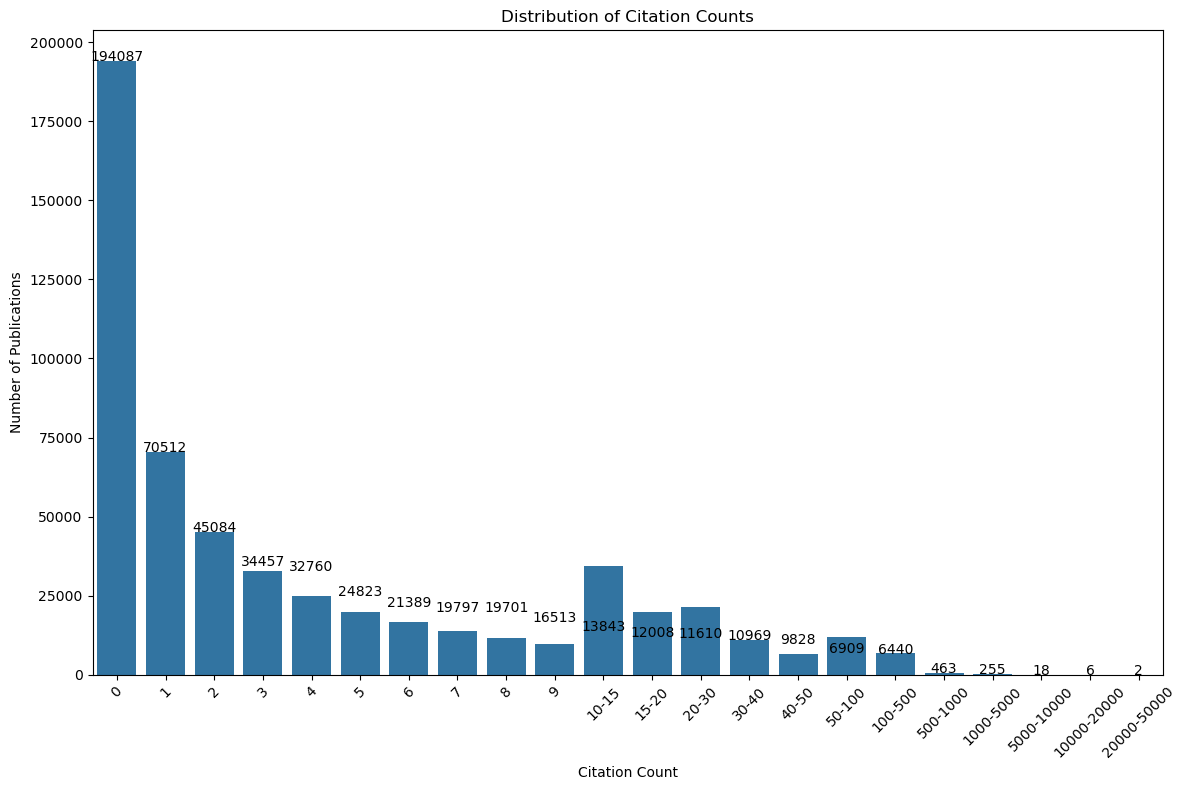

Total number of papers: 551474
Percentage of papers with 0 citations: 35.19%
Percentage of papers with 1 citation: 12.79%
Number of papers with more than 100 citations: 7559
Percentage of papers with more than 100 citations: 1.37%


In [35]:
# Citations analysis
import seaborn as sns
# Load the combined metadata file
df = pd.read_csv('combined_metadata.csv')

# Count of number of publications with 0, 1 , 2, 3, 4, 5, 6, 7, 8, 9, 10-50, 50-100, etc up to 20k citations
citations = df['Citation_Count']
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100, 500, 1000, 5000, 10000, 20000, 50000]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10-15', '15-20', '20-30','30-40','40-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000']
df['Citation_Bins'] = pd.cut(citations, bins=bins, labels=labels, right=False)

# Plot the distribution of citation counts
plt.figure(figsize=(12, 8))
sns.countplot(x='Citation_Bins', data=df, order=labels)
plt.title('Distribution of Citation Counts')
plt.xlabel('Citation Count')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/home/gavinfarrell/PhD_Code/FAIR_OPEN_AI_Paper/citation_distribution.png')
#add number of publications to the top of each bar
for i in range(len(labels)):
    plt.text(i, df['Citation_Bins'].value_counts()[i], df['Citation_Bins'].value_counts()[i], ha = 'center')
plt.show()
plt.close()

#Total number of papers
total_papers = len(df)
print(f"Total number of papers: {total_papers}")

#calculate percent that have 0 citations and 1 citation
zero_citations = df['Citation_Bins'].value_counts()['0']
one_citation = df['Citation_Bins'].value_counts()['1']
total_papers = len(df)
zero_percent = (zero_citations/total_papers)*100
one_percent = (one_citation/total_papers)*100
print(f"Percentage of papers with 0 citations: {zero_percent:.2f}%")
print(f"Percentage of papers with 1 citation: {one_percent:.2f}%")

# More than 100 citations
more_than_100 = df[df['Citation_Count'] > 100]
print(f"Number of papers with more than 100 citations: {len(more_than_100)}")
print(f"Percentage of papers with more than 100 citations: {(len(more_than_100)/total_papers)*100:.2f}%")



In [ ]:
# Citations analysis



In [ ]:
# Download title and asbtract for the deduplicated ML set



In [ ]:
# Determine cut off point of papers to retain including ML & AI methods
# Final dataset of papers or analysis figure


In [ ]:
# check citation counts analsyis for top vs bottom 
# avergae citation count of all papers
# tf-idf of top papers - spot ml models: expect alphafold / BERT / GPT-3 / some databses & tooling /etc




In [ ]:
# Feed metrics of top 10k and get jorunals of each 
